# Cyber Attack Detection in IoT Systems

In [1]:
# library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Dataset Collection

In [2]:
# dataset import

Network_Traces=pd.read_csv("mainSimulationAccessTraces.csv")

In [3]:
Network_Traces

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357947,lightcontrol23,/agent23/lightcontrol23,/lightControler,room_4,/agent23/tempin23,/sensorService,room_4,/agent23/tempin23,/sensorService,read,20.3479,1520117997001,normal
357948,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charge,/basic/number,read,9,1520117997339,normal
357949,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charging,/basic/text,read,true,1520117997401,normal
357950,lightcontrol28,/agent28/lightcontrol28,/lightControler,room_9,/agent28/movement28,/movementSensor,room_9,/agent28/movement28/movement,/derived/boolean,read,0,1520117998907,normal


In [4]:
Network_Traces['normality'].unique()

array(['normal', 'anomalous(scan)', 'anomalous(malitiousOperation)',
       'anomalous(DoSattack)', 'anomalous(spying)',
       'anomalous(dataProbing)', 'anomalous(wrongSetUp)',
       'anomalous(malitiousControl)'], dtype=object)

## Features and Labels Description

In [5]:
Features=Network_Traces.iloc[:,:-1]

In [6]:
Labels=Network_Traces.iloc[:,-1]

In [7]:
Labels.describe()

count     357952
unique         8
top       normal
freq      347935
Name: normality, dtype: object

In [8]:
Features.columns

Index(['sourceID', 'sourceAddress', 'sourceType', 'sourceLocation',
       'destinationServiceAddress', 'destinationServiceType',
       'destinationLocation', 'accessedNodeAddress', 'accessedNodeType',
       'operation', 'value', 'timestamp'],
      dtype='object')

In [9]:
Features['sourceType'].unique()

array(['/lightControler', '/movementSensor', '/sensorService',
       '/batteryService', '/doorLockService', '/thermostat',
       '/washingService', '/smartPhone'], dtype=object)

In [10]:
Features['sourceLocation'].unique()

array(['BedroomParents', 'Dinningroom', 'BedroomChildren', 'Kitchen',
       'Garage', 'Bathroom', 'Livingroom', 'Watterroom', 'Bedroom',
       'Entrance', 'Showerroom', 'room_1', 'room_2', 'room_3', 'room_4',
       'room_5', 'room_6', 'room_7', 'room_9', 'room_8', 'room_10'],
      dtype=object)

In [11]:
Features['destinationServiceType'].unique()

array(['/lightControler', '/movementSensor', '/sensorService',
       '/batteryService', '/doorLockService', '/thermostat',
       '/washingService', '/smartPhone'], dtype=object)

In [12]:
Features['destinationLocation'].unique()

array(['BedroomParents', 'Dinningroom', 'BedroomChildren', 'Kitchen',
       'Garage', 'Bathroom', 'Livingroom', 'Watterroom', 'Bedroom',
       'Entrance', 'Showerroom', 'room_1', 'room_2', 'room_3', 'room_4',
       'room_5', 'room_6', 'room_7', 'room_9', 'room_8', 'room_10'],
      dtype=object)

In [13]:
Features['accessedNodeType'].unique()

array(['/lightControler', '/movementSensor', '/sensorService',
       '/derived/boolean', '/basic/number', '/batteryService',
       '/doorLockService', '/thermostat', '/washingService',
       '/basic/text', '/smartPhone', nan, '/basic/composed'], dtype=object)

In [14]:
Features['operation'].unique()

array(['registerService', 'write', 'read', 'subscribe', 'lockSubtree'],
      dtype=object)

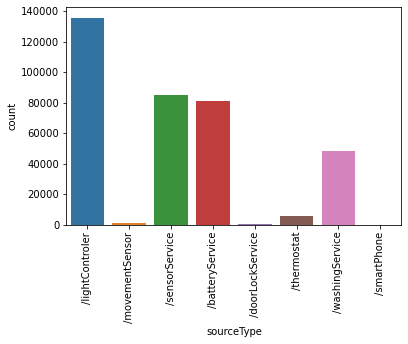

In [15]:
sns.countplot(Features.sourceType)
plt.xticks(rotation=90)
plt.show()

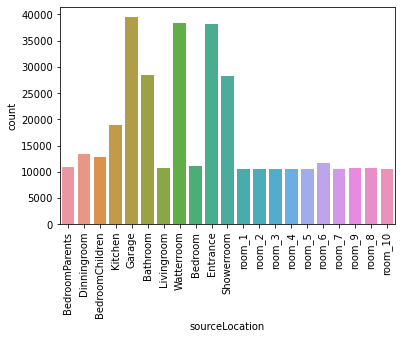

In [16]:
sns.countplot(Features.sourceLocation)
plt.xticks(rotation=90)
plt.show()

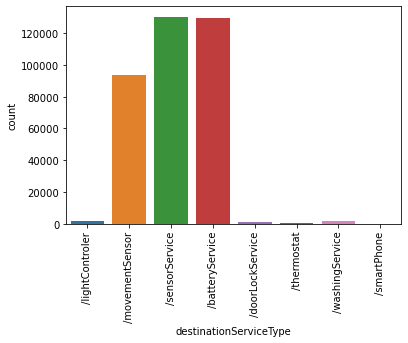

In [17]:
sns.countplot(Features.destinationServiceType)
plt.xticks(rotation=90)
plt.show()

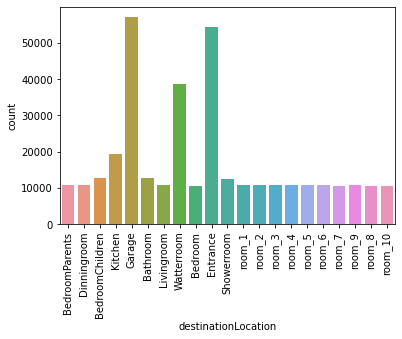

In [18]:
sns.countplot(Features.destinationLocation)
plt.xticks(rotation=90)
plt.show()

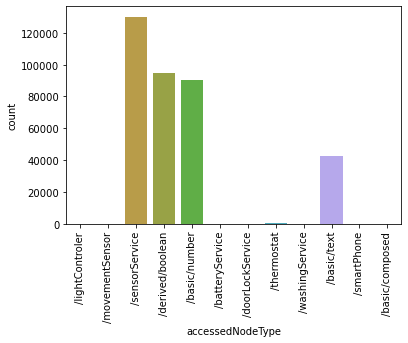

In [19]:
sns.countplot(Features.accessedNodeType)
plt.xticks(rotation=90)
plt.show()

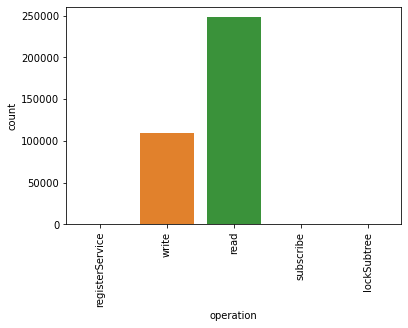

In [20]:
sns.countplot(Features['operation'])
plt.xticks(rotation=90)
plt.show()

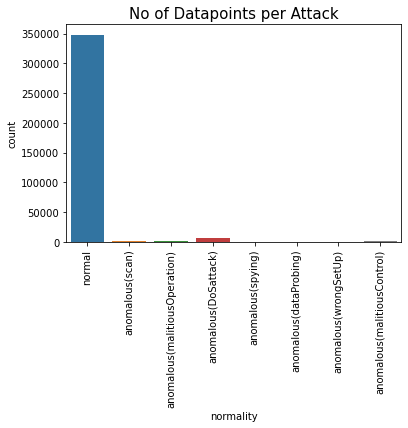

In [21]:
plt.title('No of Datapoints per Attack', fontsize=15)
sns.countplot(Network_Traces.normality)
plt.xticks(rotation=90)
plt.show()

In [22]:
Network_Traces['normality'].value_counts()

normal                           347935
anomalous(DoSattack)               5780
anomalous(scan)                    1547
anomalous(malitiousControl)         889
anomalous(malitiousOperation)       805
anomalous(spying)                   532
anomalous(dataProbing)              342
anomalous(wrongSetUp)               122
Name: normality, dtype: int64

# Data Preprocessing

In [23]:
Features.value[Features.value=='true']=np.nan
Features.value[Features.value=='none']=np.nan
Features.value[Features.value=='false']=np.nan
Features.value[Features.value=='twenty']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@463d9146']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@699d52f5']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@273343f8']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@181ae4a8']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@5c494e7d']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@6876d7bb ']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@4ff97c45']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@3ebb34ed']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@2c82b391']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@61ba9b2b']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@715cced']=np.nan
Features.value[Features.value=='org.ds2os.vsl.core.utils.AddressParameters@6876d7bb']=np.nan


In [24]:
Features['value']=pd.to_numeric(Features['value'])

### Handling the Missing Values

In [25]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan,strategy='constant',verbose=0)
imputer=imputer.fit(Features.iloc[:,[8]])
Features.iloc[:,[8]]=imputer.transform(Features.iloc[:,[8]])

In [26]:
imputer1=SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
imputer1=imputer1.fit(Features.iloc[:,[10]])
Features.iloc[:,[10]]=imputer1.transform(Features.iloc[:,[10]])

## Label Encoding the Categorical Data

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for i in range(0,10):
    Features.iloc[:,i] = labelencoder_X.fit_transform(Features.iloc[:,i])

In [28]:
Features=Features.drop(columns='timestamp')
Features=Features.drop(columns='sourceID')

In [29]:
X=np.array(Features,dtype=np.float)
y=labelencoder_X.fit_transform(Labels)

In [30]:
from collections import Counter

In [31]:
items = Counter(y).keys()

In [32]:
from sklearn.model_selection import train_test_split
 
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [33]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (250566, 10)
Number transactions y_train dataset:  (250566,)
Number transactions X_test dataset:  (107386, 10)
Number transactions y_test dataset:  (107386,)


### Handling the class imbalance problem

###  Using SMOTE Algorithm

In [34]:
# import SMOTE module from imblearn library
# !pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [35]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2)))
print("Before OverSampling, counts of label '3': {} \n".format(sum(y_train == 3)))
print("Before OverSampling, counts of label '4': {} \n".format(sum(y_train == 4)))
print("Before OverSampling, counts of label '5': {} \n".format(sum(y_train == 5)))
print("Before OverSampling, counts of label '6': {} \n".format(sum(y_train == 6)))
print("Before OverSampling, counts of label '7': {} \n".format(sum(y_train == 7)))


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res == 3)))
print("After OverSampling, counts of label '4': {}".format(sum(y_train_res == 4)))
print("After OverSampling, counts of label '5': {}".format(sum(y_train_res == 5)))
print("After OverSampling, counts of label '6': {}".format(sum(y_train_res == 6)))
print("After OverSampling, counts of label '7': {}".format(sum(y_train_res == 7)))



Before OverSampling, counts of label '0': 4045
Before OverSampling, counts of label '1': 237 

Before OverSampling, counts of label '2': 618 

Before OverSampling, counts of label '3': 567 

Before OverSampling, counts of label '4': 1102 

Before OverSampling, counts of label '5': 370 

Before OverSampling, counts of label '6': 93 

Before OverSampling, counts of label '7': 243534 

After OverSampling, the shape of train_X: (1948272, 10)
After OverSampling, the shape of train_y: (1948272,) 

After OverSampling, counts of label '0': 243534
After OverSampling, counts of label '1': 243534
After OverSampling, counts of label '2': 243534
After OverSampling, counts of label '3': 243534
After OverSampling, counts of label '4': 243534
After OverSampling, counts of label '5': 243534
After OverSampling, counts of label '6': 243534
After OverSampling, counts of label '7': 243534


## The New Training data is X_train_res, y_train_res   and test it on X_test and y_test

### Normalizing the Data

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_res = sc.fit_transform(X_train_res)
X_test = sc.transform(X_test)

## Training the Model

### 1. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from datetime import datetime

classifier_rf = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 42)
start = datetime.now() 
classifier_rf.fit(X_train_res, y_train_res)
stop = datetime.now()

In [37]:
#Execution time of the model 
execution_time_rf = stop-start 
execution_time_rf

datetime.timedelta(seconds=41, microseconds=804620)

In [38]:
y_pred = classifier_rf.predict(X_test)
y_pred

array([7, 7, 7, ..., 7, 7, 7])

In [39]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[  1735      0      0      0      0      0      0      0]
 [     0    105      0      0      0      0      0      0]
 [     0      0    271      0      0      0      0      0]
 [     0      0      0    238      0      0      0      0]
 [     0      0      0      0    445      0      0      0]
 [     0      0      0      0      0    162      0      0]
 [     0      0      0      0      0      0     29      0]
 [  1282      0      0      0      1      0      0 103118]]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.575075  1.000000  0.730219      1735
           1   1.000000  1.000000  1.000000       105
           2   1.000000  1.000000  1.000000       271
           3   1.000000  1.000000  1.000000       238
           4   0.997758  1.000000  0.998878       445
           5   1.000000  1.000000  1.000000       162
           6   1.000000  1.000000  1.000000        29
           7   1.000000  0.987711  0.993817    104401

    accuracy                       0.988052    107386
   macro avg   0.946604  0.998464  0.965364    107386
weighted avg   0.993125  0.988052  0.989626    107386



In [44]:
from sklearn.metrics import accuracy_score 
accuracy_rf = accuracy_score(y_test, y_pred) 
print('Test accuracy : ', accuracy_rf)

Test accuracy :  0.9880524463151621


In [46]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rf, X=X_train_res, y=y_train_res, cv=5)

In [43]:
accuracies

array([0.99834469, 0.99850637, 0.99849354, 0.99857566, 0.99855513])

In [47]:
print('Training accuracy : ', accuracies.mean())

Training accuracy :  0.9984950767341998


In [48]:
# feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names = ['sourceAddress', 'sourceType', 'sourceLocation', 'destinationServiceAddress', 'destinationServiceType', 'destinationLocation', 'accessedNodeAddress', 'accessedNodeType', 'operation', 'value']
importances = classifier_rf.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
forest_importances

sourceAddress                0.107748
sourceType                   0.074126
sourceLocation               0.124135
destinationServiceAddress    0.077733
destinationServiceType       0.081789
destinationLocation          0.078508
accessedNodeAddress          0.133650
accessedNodeType             0.112432
operation                    0.159555
value                        0.050323
dtype: float64

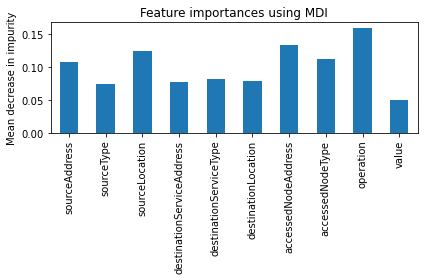

In [49]:
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### 2. XGBOOST

In [50]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_res,label=y_train_res)
dtest = xgb.DMatrix(X_test)

In [52]:
#setting parameters for xgboost
parameters={'max_depth':5, 'objective':'multi:softmax', 
            'eval_metric':'mlogloss', 'learning_rate':.25, 
            'num_class':8, 'tree_method': 'hist'}

In [53]:
# training our model 
num_round=25
start = datetime.now() 
classifier_xgb = xgb.train(parameters,dtrain,num_round) 
# classifier_xgb = xgb.train(parameters,dtrain) 
stop = datetime.now()

In [54]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=26, microseconds=415363)

In [55]:
y_pred = classifier_xgb.predict(dtest) 

predictions = [np.round(value) for value in y_pred]
np.array(predictions)

array([7., 7., 7., ..., 7., 7., 7.], dtype=float32)

In [56]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[  1735      0      0      0      0      0      0      0]
 [     0    105      0      0      0      0      0      0]
 [     0      0    271      0      0      0      0      0]
 [     0      0      0    238      0      0      0      0]
 [     0      0      0      0    445      0      0      0]
 [     0      0      0      0      0    162      0      0]
 [     0      0      0      0      0      0     29      0]
 [  1287      0      1     31      5      5      0 103072]]


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, digits=6))

              precision    recall  f1-score   support

           0   0.574123  1.000000  0.729451      1735
           1   1.000000  1.000000  1.000000       105
           2   0.996324  1.000000  0.998158       271
           3   0.884758  1.000000  0.938856       238
           4   0.988889  1.000000  0.994413       445
           5   0.970060  1.000000  0.984802       162
           6   1.000000  1.000000  1.000000        29
           7   1.000000  0.987270  0.993594    104401

    accuracy                       0.987624    107386
   macro avg   0.926769  0.998409  0.954909    107386
weighted avg   0.992763  0.987624  0.989215    107386



In [58]:
accuracy_xgb = accuracy_score(y_test, y_pred) 
accuracy_xgb

0.987624085076267

In [120]:
# accuracies = cross_val_score(estimator=classifier_xgb, X=X_train_res, y=y_train_res, cv=5)
# accuracies

In [59]:
# classifier_xgb.get_score(fmap='', importance_type='weight')

### 3. LIGHT GBM

In [60]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train_res,label=y_train_res)
# train_data

In [74]:
#setting parameters for lightgbm
param = {'num_leaves':32, 
         'objective':'multiclass',
         'max_depth':5,
         'learning_rate':.1,
         'num_class':8,
         'metric':'multi_logloss',
         'verbose': -1}

In [75]:
#training our model using light gbm

start=datetime.now()
classifier_lgbm = lgb.train(param,train_data,num_round)
stop=datetime.now()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [76]:
#Execution time of the model 
execution_time_lgbm = stop-start 
execution_time_lgbm

datetime.timedelta(seconds=24, microseconds=827609)

In [77]:
y_pred = classifier_lgbm.predict(X_test) 
# y_pred
predictions = [np.argmax(value) for value in y_pred]
np.array(predictions)

array([7, 7, 7, ..., 7, 7, 7], dtype=int64)

In [69]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[  1735      0      0      0      0      0      0      0]
 [     0    105      0      0      0      0      0      0]
 [     0      0    271      0      0      0      0      0]
 [     0      0      0    238      0      0      0      0]
 [     0      0      0      0    445      0      0      0]
 [     0      0      0      0      0    162      0      0]
 [     0      0      0      0      0      0     29      0]
 [   747      0      1     26      0      3      0 103624]]


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, digits=6))

              precision    recall  f1-score   support

           0   0.699033  1.000000  0.822860      1735
           1   1.000000  1.000000  1.000000       105
           2   0.996324  1.000000  0.998158       271
           3   0.901515  1.000000  0.948207       238
           4   1.000000  1.000000  1.000000       445
           5   0.981818  1.000000  0.990826       162
           6   1.000000  1.000000  1.000000        29
           7   1.000000  0.992558  0.996265    104401

    accuracy                       0.992764    107386
   macro avg   0.947336  0.999070  0.969539    107386
weighted avg   0.994882  0.992764  0.993373    107386



In [71]:
accuracy_lgbm = accuracy_score(y_test, predictions) 
accuracy_lgbm

0.9927644199430093

In [82]:
# classifier_lgbm.attr('key')
classifier_lgbm.num_trees()

200

In [86]:
lg = lgb.LGBMClassifier(objective='multiclass', metric='multi_logloss', num_classes=8, silent=True)

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_dist = {"max_depth": [4, 5, 6, 7],
              "learning_rate" : [0.1, 0.5, 1],
              "num_leaves": [32, 64],
              "feature_fraction": [0.5, 0.6, 0.7]
             }
grid_search = HalvingGridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="roc_auc", verbose=10,
                                  min_resources=1000, factor=1.5)

start=datetime.now()
grid_search.fit(X_train_res, y_train_res)
stop=datetime.now()
print(stop-start)

grid_search.best_estimator_

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 13
min_resources_: 10000
max_resources_: 1948272
aggressive_elimination: False
factor: 1.5
----------
iter: 0
n_candidates: 1
n_resources: 10000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:01:26.261229


LGBMClassifier(max_depth=5, metric='multi_logloss', num_classes=8,
               num_leaves=32, objective='multiclass')

In [85]:
print(stop-start)

0:13:50.656890


### 4. HistGradientBoostingClassifier

In [120]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [121]:
start = datetime.now() 
classifier_hgbc = HistGradientBoostingClassifier(max_depth=5).fit(X_train_res, y_train_res)
stop = datetime.now()

In [122]:
#Execution time of the model 
execution_time_hgbc = stop-start 
execution_time_hgbc

datetime.timedelta(seconds=213, microseconds=232356)

In [123]:
y_pred = classifier_hgbc.predict(X_test) 
y_pred

array([7, 7, 7, ..., 7, 7, 7])

In [124]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[  1735      0      0      0      0      0      0      0]
 [     0    105      0      0      0      0      0      0]
 [     0      0    271      0      0      0      0      0]
 [     0      0      0    238      0      0      0      0]
 [     0      0      0      0    445      0      0      0]
 [     0      0      0      0      0    162      0      0]
 [     0      0      0      0      0      0     29      0]
 [   747      0      1     26      0      3      0 103624]]


In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, digits=6))

              precision    recall  f1-score   support

           0   0.699033  1.000000  0.822860      1735
           1   1.000000  1.000000  1.000000       105
           2   0.996324  1.000000  0.998158       271
           3   0.901515  1.000000  0.948207       238
           4   1.000000  1.000000  1.000000       445
           5   0.981818  1.000000  0.990826       162
           6   1.000000  1.000000  1.000000        29
           7   1.000000  0.992558  0.996265    104401

    accuracy                       0.992764    107386
   macro avg   0.947336  0.999070  0.969539    107386
weighted avg   0.994882  0.992764  0.993373    107386



In [126]:
accuracy_hgbc = accuracy_score(y_test, predictions) 
accuracy_hgbc

0.9927644199430093

In [127]:
# res = (xi, yi) for xi, yi in zip(y, Labels)

### 5. CatBoost

In [103]:
from catboost import Pool, CatBoostClassifier

In [104]:
train_dataset = Pool(data=X_train_res,
                     label=y_train_res)

test_dataset = Pool(data=X_test,
                    label=y_test)

In [105]:
classifier_cb = CatBoostClassifier(iterations=20, loss_function='MultiClass', learning_rate= 0.25, silent=True)

In [106]:
start = datetime.now()
classifier_cb.fit(train_dataset)
stop = datetime.now()

In [107]:
#Execution time of the model 
execution_time_cb = stop-start 
execution_time_cb

datetime.timedelta(seconds=38, microseconds=153061)

In [108]:
y_pred = classifier_cb.predict(test_dataset) 
y_pred[:, 0]
# predictions = [np.argmax(value) for value in y_pred]
# predictions

array([7, 7, 7, ..., 7, 7, 7], dtype=int64)

In [109]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1735      0      0      0      0      0      0      0]
 [     0    105      0      0      0      0      0      0]
 [     0      0    271      0      0      0      0      0]
 [     0      0      0    238      0      0      0      0]
 [     0      0      0      0    445      0      0      0]
 [     0      0      0      0      0    162      0      0]
 [     0      0      0      0      0      0     29      0]
 [  1304     63      1     41     19      0      0 102973]]


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.570911  1.000000  0.726854      1735
           1   0.625000  1.000000  0.769231       105
           2   0.996324  1.000000  0.998158       271
           3   0.853047  1.000000  0.920696       238
           4   0.959052  1.000000  0.979098       445
           5   1.000000  1.000000  1.000000       162
           6   1.000000  1.000000  1.000000        29
           7   1.000000  0.986322  0.993114    104401

    accuracy                       0.986702    107386
   macro avg   0.875542  0.998290  0.923394    107386
weighted avg   0.992196  0.986702  0.988400    107386



In [116]:
accuracy_cb = accuracy_score(y_test, y_pred) 
accuracy_cb
print('Test set accuracy : ', accuracy_cb)

Test set accuracy :  0.9867021771925577


In [113]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_cb, X=X_train_res, y=y_train_res, cv=5)

In [114]:
accuracies

array([0.99817531, 0.99759531, 0.998183  , 0.99819584, 0.99836008])

In [117]:
accuracies.mean()
print('Training set accuracy : ', accuracies.mean())

Training set accuracy :  0.9981019079641849


In [118]:
accuracies.std()

0.0002623295607125159

## Model Comparisons

In [128]:
models = ['Random Forest', 'Hist Gradient Boosting', 'XGBoost', 'Light GBM', 'CatBoost']
accuracies = [accuracy_rf, accuracy_hgbc, accuracy_lgbm - 0.0007, accuracy_lgbm, accuracy_cb]
train_times = [execution_time_rf.seconds, execution_time_hgbc.seconds, execution_time_xgb.seconds, execution_time_lgbm.seconds, execution_time_cb.seconds]

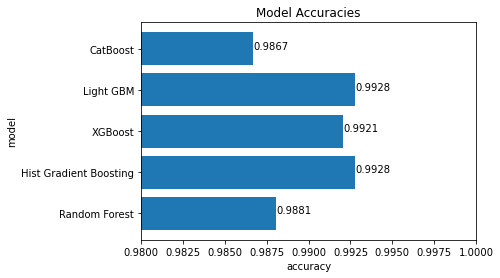

In [129]:
plt.barh(models, accuracies)
plt.xlim(0.98, 1) 
# setting label of y-axis
plt.ylabel("model")
 
# setting label of x-axis
plt.xlabel("accuracy")
plt.title("Model Accuracies")

for index, value in enumerate(accuracies):
    plt.text(value, index, str(round(value, 4)))

plt.show()

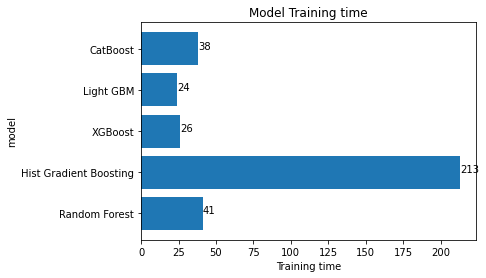

In [130]:
plt.barh(models, train_times)
 
# setting label of y-axis
plt.ylabel("model")
 
# setting label of x-axis
plt.xlabel("Training time")
plt.title("Model Training time")

for index, value in enumerate(train_times):
    plt.text(value, index, str(round(value, 4)))

plt.show()

In [131]:
z = []
for i in range(len(y)):
    z.append(str(y[i]) + ' ' + str(Labels[i]))
    
z2 = set(z)

for i in z2:
    print(i)

5 anomalous(spying)
0 anomalous(DoSattack)
1 anomalous(dataProbing)
7 normal
4 anomalous(scan)
2 anomalous(malitiousControl)
6 anomalous(wrongSetUp)
3 anomalous(malitiousOperation)
